In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

def make_urlist(page_num,code,date):
    urlist=[]
    for i in range(1,page_num+1):
        url='https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=001'+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url,headers=headers)
        
        soup = BeautifulSoup(news.content,'html.parser')
        
        news_list = soup.select('.newsflash_body.type06_headline li dl')
        news_list.extend(soup.select('.newsflash_body.type06 li dl'))
        
        for line in news_list:
            urlist.append(line.a.get('href'))
        
        return urlist

In [7]:
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [8]:
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

In [9]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [10]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

In [11]:
data = make_data(url_list, 101)
data[:10]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


In [12]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [13]:
def make_total_data(page_num, code_list, date):
    df = None
    
    for code in code_list:
        url_list = make_urllist(page_num,code,date)
        df_temp = make_data(url_list,code)
        print(str(code)+'번 코드에 대한 데이터를 생성했습니다.')
        
        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp
            
    return df

In [14]:
df = make_total_data(1, code_list, 20201121)

102번 코드에 대한 데이터를 생성했습니다.
103번 코드에 대한 데이터를 생성했습니다.
105번 코드에 대한 데이터를 생성했습니다.


In [15]:
len(df)

60

In [16]:
df.sample(10)

,news,code
17,애플 무선 충전기 '맥세이프 듀오' /사진=애플 애플 무선 충전기 '맥세이프 듀오'...,IT/과학
11,국방부\n\n[연합뉴스TV 제공] 국방부[연합뉴스TV 제공]\n\n(서울=연합뉴스)...,사회
13,기사와 직접적 관련 없는 참고사진. ⓒGettyImagesBank 기사와 직접적 관...,사회
19,© News1 최수아 디자이너 © News1 최수아 디자이너\n\n(서울=뉴스1) ...,IT/과학
8,이정환 한국재료연구원 초대 원장과 직원들이 본관 옥상에서 한국재료연구원 깃발을 게양...,사회
8,당근마켓 ‘동네생활’ 서비스 화면. 당근마켓 제공 당근마켓 ‘동네생활’ 서비스 화면...,IT/과학
18,사단법인 대한민국국가조찬기도회(회장 두상달 장로)는 오는 24일 오전 11시 서울 ...,생활/문화
5,[한국경제TV 김현경 기자]\n\n최근 한국 내 '코로나19'가 확산하자 주한미군 ...,사회
4,[울산CBS 이상록 기자]\n\n(사진=자료사진) (사진=자료사진)\n\n울산에서 ...,사회
18,[아시아경제 이정윤 기자] 상대방 신체를 미리 촬영하고 이를 이용해 협박하는 사건이...,사회


In [21]:
df = make_total_data(100,code_list,20201111)

102번 코드에 대한 데이터를 생성했습니다.
103번 코드에 대한 데이터를 생성했습니다.
105번 코드에 대한 데이터를 생성했습니다.


In [22]:
len(df)

5366

In [29]:
import os
csv_path = 'news_data.csv'
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{}File saved!'.format(csv_path))

news_data.csvFile saved!


In [2]:
import pandas as pd
csv_path = './news_data.csv'
df = pd.read_csv(csv_path)
df.head()

,news,code
0,우승희 전남도의원 우승희 전남도의원\n\n[아시아경제 호남취재본부 이준경 기자] 우...,사회
1,박미라 '치유하는글쓰기 연구소' 소장 ⓒ홍수형 기자 박미라 '치유하는글쓰기 연구소'...,사회
2,'제25회 경기도 농업인의 날 기념식'이 11일 경기도농업기술원에서 열렸다. / 사...,사회
3,[앵커]신차 구매 후 결함이 반복될 때 교환이나 환불을 받을 수 있도록 개정된 자동...,사회
4,(서울=뉴스1) = 11일 서울시 JW메리어트호텔 그랜드볼룸에서 6.25전쟁 70주...,사회


In [3]:
df['news']=df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
df['news']

0       우승희전남도의원우승희전남도의원아시아경제호남취재본부이준경기자우승희전남도의원더불어민주당...
1       박미라치유하는글쓰기연구소소장홍수형기자박미라치유하는글쓰기연구소소장홍수형기자심리학자는왜...
2       제회경기도농업인의날기념식이일경기도농업기술원에서열렸다사진제공경기도제회경기도농업인의날기...
3       앵커신차구매후결함이반복될때교환이나환불을받을수있도록개정된자동차관리법일명레몬법이도입된지...
4       서울뉴스일서울시메리어트호텔그랜드볼룸에서전쟁주년사업추진위원회공동위원장정세균김은기주관으...
                              ...                        
5361    조시가이걸버진하이퍼루프의최고기술책임자와세라루키언고객경험담당이사가일현지시간진행한하이퍼...
5362    이상훈시스원대표신사옥에마련한자사제품전시관에서자동출입국심사대를포함한출입국솔루션기술을시...
5363    애플이일오전시한국시간온라인신제품공개행사를개최한다애플제공애플이일오전시한국시간온라인신제...
5364    스포츠서울김수지기자애플의신제품아이폰아이폰프로가출시되자마자폭발적인인기를나타내고있는가운...
5365    엑스포츠뉴스최지영기자리그오브레전드이하롤이프리시즌패치를위한서버점검을실시한다리그오브레전...
Name: news, Length: 5366, dtype: object

In [4]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [5]:
df.sample()

,news,code
4174,아이뉴스문영수기자넷마블대표권영식이승원은년도분기매출천억원영업이익억원당기순이익억원을기록...,IT/과학


In [6]:
df.drop_duplicates(subset=['news'],inplace=True)
print("뉴스 기사의 개수: ",len(df))

뉴스 기사의 개수:  3956


In [7]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

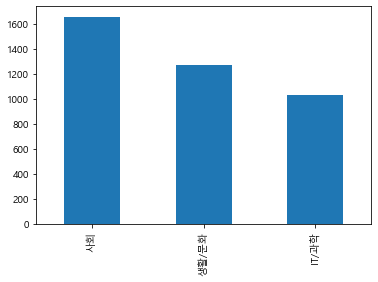

In [8]:
df['code'].value_counts().plot(kind='bar')

In [9]:
print(df.groupby('code').size().reset_index(name='count'))

    code  count
0  IT/과학   1029
1     사회   1655
2  생활/문화   1272


In [11]:
from konlpy.tag import Mecab
tokenizer = Mecab('C:/mecab/mecab-ko-dic/') # 윈도우라서

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


In [12]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [26]:
def preprocessing(data):
    text_data = []
    
    for sentence in data:
        temp_data = []
        temp_data = tokenizer.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)
        
        text_data = list(map(''.join,text_data))
        
    return text_data

In [27]:
text_data = preprocessing(df['news'])
print(text_data[0])

우승희전남도의원우승희전남도의원아시아경제호남취재본부이준경우승희전남도의원더불어민주당영암전남문화예술행사관람률전국에서최하위를차지다고꼬집었일우승희의원따르면문화관광체육부조사국민문화예술활동에서전남문화예술행사관람률지난해로전국평균비해최하위를차지전남문화기반시설총개로전국위를기록그럼에도문화향유율낮이유농어촌도서지역문화취약계층인노인저소득층많고문화예술활동이나교통접근성낮기인것으로파악된다우승희의원전남도행정사무감사에서남도문예르네상스종합계획추진상황확인결과올해까지당초계획사업비만투입고매년감소고다고지적전남도지난년부터추진남도문예르네상스종합계획올해까지억원사업비를투입해개분야개사업추진예정인사업그러나전남도가우승희의원제출행정사무감사자료의하면올해현재까지억원만투입또지난년억원지난해억원올해억원사업비매년감소다우승희의원남도문예르네상스사업국제수묵비엔날레만제대로추진되고다른사업도민체감지못하실정다며남도문예르네상스브랜드화와시군또는민간주도로사업추진여도민일상속에서전남문화를향유여건기회를확대해야한다고지적어학생도민교육프로그램확대문화예술단체예술활동지원저소득층위한문화누리카드활성화언택트시대맞다양콘텐츠제공일자리창출로이어져야한다고강조호남취재본부이준경


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [30]:
text_data[0]

'우승희전남도의원우승희전남도의원아시아경제호남취재본부이준경우승희전남도의원더불어민주당영암전남문화예술행사관람률전국에서최하위를차지다고꼬집었일우승희의원따르면문화관광체육부조사국민문화예술활동에서전남문화예술행사관람률지난해로전국평균비해최하위를차지전남문화기반시설총개로전국위를기록그럼에도문화향유율낮이유농어촌도서지역문화취약계층인노인저소득층많고문화예술활동이나교통접근성낮기인것으로파악된다우승희의원전남도행정사무감사에서남도문예르네상스종합계획추진상황확인결과올해까지당초계획사업비만투입고매년감소고다고지적전남도지난년부터추진남도문예르네상스종합계획올해까지억원사업비를투입해개분야개사업추진예정인사업그러나전남도가우승희의원제출행정사무감사자료의하면올해현재까지억원만투입또지난년억원지난해억원올해억원사업비매년감소다우승희의원남도문예르네상스사업국제수묵비엔날레만제대로추진되고다른사업도민체감지못하실정다며남도문예르네상스브랜드화와시군또는민간주도로사업추진여도민일상속에서전남문화를향유여건기회를확대해야한다고지적어학생도민교육프로그램확대문화예술단체예술활동지원저소득층위한문화누리카드활성화언택트시대맞다양콘텐츠제공일자리창출로이어져야한다고강조호남취재본부이준경'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state=0)

In [33]:
len(X_train)

2967

In [34]:
len(y_train)

2967

In [40]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf,y_train)

In [ ]:
def 